# import library

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# membuka file

In [67]:
df = pd.read_excel(r'D:\purwadhika\lamaran kerja\3\Test-Analyst.xlsx')

In [68]:
df

,product_title,shipping_city,referrer_source,orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,net_quantity
0,Canary Scarf Seafoam,Kota Palembang,Social,1.0,275.000.000,0.0,0.0,275.000.000,0.0,275.000.000,1.0
1,Claire Blouse Burnt Cinnamon,Kota Palembang,Social,1.0,238.000.000,0.0,0.0,238.000.000,0.0,238.000.000,1.0
2,Shea Blouse Sahara,Kab. Bogor,Social,1.0,535.000.000,0.0,0.0,535.000.000,0.0,535.000.000,1.0
3,Sheila Dress Clove,Kab. Bogor,Social,1.0,475.000.000,0.0,0.0,475.000.000,0.0,475.000.000,1.0
4,Amaya Blouse Hazelwood,Kab. Bogor,Social,1.0,545.000.000,0.0,0.0,545.000.000,0.0,545.000.000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
214,Bella Blouse Strawberry,Surabaya,Search,1.0,350.000.000,0.0,0.0,350.000.000,0.0,350.000.000,1.0
215,Valerie Dress Gravel,Kab. Jember,Social,1.0,475.000.000,0.0,0.0,475.000.000,0.0,475.000.000,1.0
216,Alice Blouse Caramel Latte,Jakarta,Social,1.0,200.000.000,0.0,0.0,200.000.000,0.0,200.000.000,1.0
217,Amanda Dress Almond Latte,Kab. Jember,Social,1.0,475.000.000,0.0,0.0,475.000.000,0.0,475.000.000,1.0


# deskripsi tiap kolom
- product_title : nama produk
- shipping_city : kota/kab tempat tujuan pengiriman barang
- referrer_source
- orders : jumlah barang yang di order
- gross_sales : harga barang sebelum diskon
- discounts : besarnya diskon dalam rupiah
- returns : jumlah pengembalian barang
- net_sales : harga barang setelah di diskon
- shipping : biaya pengangkutan barang
- total_sales : biaya net sales ditambah total sales
- net_quantity

# mengetahui informasi dari dataset

In [69]:
Dataset = []
for i in df.columns :
    Dataset.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum()/len(df))*100,2),
        df[i].nunique()
    ])
pd.DataFrame(data = Dataset,
            columns=[
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique'
            ])

,Features,DataType,Null,NullPercentage,Unique
0,product_title,object,0,0.0,147
1,shipping_city,object,0,0.0,94
2,referrer_source,object,0,0.0,4
3,orders,float64,0,0.0,3
4,gross_sales,object,0,0.0,50
5,discounts,object,0,0.0,9
6,returns,object,0,0.0,2
7,net_sales,object,0,0.0,57
8,shipping,float64,0,0.0,1
9,total_sales,object,0,0.0,57


# mengecek data terduplikasi dan missing value

mengecek data terduplikasi

In [70]:
df.duplicated().any()

False

mengecek missing value

In [71]:
df.isna().sum()

product_title      0
shipping_city      0
referrer_source    0
orders             0
gross_sales        0
discounts          0
returns            0
net_sales          0
shipping           0
total_sales        0
net_quantity       0
dtype: int64

# melihat dan mengubah isi dari beberapa kolom

mengecek isi kolom product title

In [72]:
df['product_title'].value_counts().head(6)

Claire Blouse Crystal Ruby    8
Amaya Blouse Hazelwood        5
Ruby Scarf Ocean Mist         5
Selena Dress Misty Grey       4
Talia Dress Woodrose          4
Alice Brooch                  4
Name: product_title, dtype: int64

mengecek isi kolom shipping city

In [139]:
df['shipping_city'].value_counts()

Kota Palembang               9
Tangerang Selatan            9
Kota Bekasi                  8
Kota Tangerang               8
Kota Adm. Jakarta Selatan    7
                            ..
Kab. Probolinggo             1
Sleman                       1
Ketapant                     1
Kab. Pasaman Barat           1
Kota Blitar                  1
Name: shipping_city, Length: 94, dtype: int64

mengecek isi kolom referrer_source

In [74]:
df['referrer_source'].value_counts()

Social     114
Direct      68
Search      35
Unknown      2
Name: referrer_source, dtype: int64

mengubah isi kolom unknown pada kolom referrer_source dengan modus kolom

In [75]:
df['referrer_source'] = df['referrer_source'].replace(['Unknown'],'Social')

mengecek isi kolom orders

In [76]:
df['orders'].value_counts()

1.0    217
0.0      1
2.0      1
Name: orders, dtype: int64

mengubah isi kolom orders yang bernilai 0 menjadi 1 karena diduga kuat terjadi kesalahan saat mengisi data. Dugaan ini diperkuat dengan fakta bahwa kolom orders bermakna jumlah barang yang di beli, jika jumlah barang yang dibeli 0 berarti tidak ada pembelian barang

In [88]:
df['orders'] = df['orders'].replace([0.0], 1.0)

mengecek isi kolom gross sales

In [77]:
df['gross_sales'].value_counts()

475.000.000      33
350.000.000      23
295.000.000      22
330.000.000      21
238.000.000      15
385.000.000      10
535.000.000       7
545.000.000       6
200.000.000       5
269.500.000       5
395.000.000       4
235.000.000       4
565.000.000       4
649.000.000       4
455.000.000       4
245.000.000       3
575.000.000       3
950.000.000       3
365.000.000       3
185.000.000       3
845.000.000       2
495.000.000       2
345.000.000       2
325.000.000       2
685.000.000       2
205.000.000       2
525.000.000       2
1.125.000.000     1
650.000.000       1
170.000.000       1
275.000.000       1
2.260.000.000     1
590.000.000       1
1.183.000.000     1
1.130.000.000     1
910.000.000       1
1.425.000.000     1
676.000.000       1
169.000.000       1
115.000.000       1
0.0               1
700.000.000       1
540.000.000       1
485.000.000       1
1.900.000.000     1
1.050.000.000     1
262.500.000       1
250.000.000       1
225.000.000       1
549.000.000       1


mengubah isi kolom gross sales dengan menghilangkan titik

In [78]:
df['gross_sales'] = df['gross_sales'].str.replace('.','')

C:\Users\fachri\AppData\Local\Temp\ipykernel_9556\2426276377.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['gross_sales'] = df['gross_sales'].str.replace('.','')


setelah kolom gross sales diperbaiki isi kolomnya dengan menghilangkan titik, terdapat missing value yang menyebabkan kolom tidak bisa ditransformasi menjadi integer

In [80]:
df[df['gross_sales'].isnull()]

,product_title,shipping_city,referrer_source,orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,net_quantity
96,Ruby Shirt Ocean Mist,Kota Bandung,Social,0.0,NaN,0.0,-495.000.000,-495.000.000,0.0,-495.000.000,-1.0


karena missing value di kolom gross_sales hanya 1 maka dilakukan penghapusan missing value, sekaligus untuk mengubah kolom ke integer

In [83]:
df.dropna(subset=['gross_sales'], inplace = True)

mengubah isi kolom gross sales menjadi integer

In [85]:
df['gross_sales'] = df['gross_sales'].astype('int64')

melihat isi kolom diskon

In [87]:
df['discounts'].value_counts()

0.0             209
-50.000.000       2
-5.724.640        1
-4.275.360        1
-3.418.810        1
-100.000.000      1
-6.581.190        1
-10.000.000       1
-20.000.000       1
Name: discounts, dtype: int64

melihat isi kolom returns

In [89]:
df['returns'].value_counts()

0.0    218
Name: returns, dtype: int64

melihat isi kolom shipping

In [90]:
df['shipping'].value_counts()

0.0    218
Name: shipping, dtype: int64

melihat isi kolom total sales

In [92]:
df['total_sales'].value_counts()

475.000.000      32
350.000.000      23
295.000.000      21
330.000.000      21
238.000.000      15
385.000.000       7
535.000.000       7
545.000.000       6
269.500.000       5
235.000.000       4
455.000.000       4
565.000.000       4
649.000.000       4
200.000.000       4
245.000.000       3
575.000.000       3
395.000.000       3
365.000.000       3
185.000.000       3
950.000.000       3
345.000.000       2
845.000.000       2
495.000.000       2
375.000.000       2
325.000.000       2
205.000.000       2
525.000.000       2
170.000.000       1
1.125.000.000     1
1.183.000.000     1
169.000.000       1
275.000.000       1
650.000.000       1
2.240.000.000     1
115.000.000       1
1.425.000.000     1
1.130.000.000     1
910.000.000       1
549.000.000       1
590.000.000       1
1.900.000.000     1
635.000.000       1
700.000.000       1
378.418.810       1
540.000.000       1
196.581.190       1
485.000.000       1
676.000.000       1
1.050.000.000     1
290.724.640       1


mengubah format kolom total sales

In [95]:
df['total_sales'] = df['total_sales'].str.replace('.','')

C:\Users\fachri\AppData\Local\Temp\ipykernel_9556\2688855075.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['total_sales'] = df['total_sales'].str.replace('.','')


mengubah isi kolom total sales menjadi integer

In [96]:
df['total_sales'] = df['total_sales'].astype('int64')

melihat isi kolom net quantity

In [91]:
df['net_quantity'].value_counts()

1.0    203
2.0      8
3.0      3
4.0      3
7.0      1
Name: net_quantity, dtype: int64

melihat isi kolom net sales

In [94]:
df['net_sales'].value_counts()

475.000.000      32
350.000.000      23
295.000.000      21
330.000.000      21
238.000.000      15
385.000.000       7
535.000.000       7
545.000.000       6
269.500.000       5
235.000.000       4
455.000.000       4
565.000.000       4
649.000.000       4
200.000.000       4
245.000.000       3
575.000.000       3
395.000.000       3
365.000.000       3
185.000.000       3
950.000.000       3
345.000.000       2
845.000.000       2
495.000.000       2
375.000.000       2
325.000.000       2
205.000.000       2
525.000.000       2
170.000.000       1
1.125.000.000     1
1.183.000.000     1
169.000.000       1
275.000.000       1
650.000.000       1
2.240.000.000     1
115.000.000       1
1.425.000.000     1
1.130.000.000     1
910.000.000       1
549.000.000       1
590.000.000       1
1.900.000.000     1
635.000.000       1
700.000.000       1
378.418.810       1
540.000.000       1
196.581.190       1
485.000.000       1
676.000.000       1
1.050.000.000     1
290.724.640       1


mengubah format kolom net sales

In [97]:
df['net_sales'] = df['net_sales'].str.replace('.','')

C:\Users\fachri\AppData\Local\Temp\ipykernel_9556\1227805557.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['net_sales'] = df['net_sales'].str.replace('.','')


mengubah isi kolom net sales menjadi integer

In [98]:
df['net_sales'] = df['net_sales'].astype('int64')

Menghapus kolom return dan shipping karena isinya homogen (hanya berisi angka 0.0)

In [101]:
df.drop(columns=['returns', 'shipping'], inplace=True)

# EDA

1. Sebutkan 10 produk yang paling banyak dibeli
2. sebutkan 10 produk dengan total sales tertinggi
3. sebutkan 10 shipping city terbanyak
4. sebutkan 10 kota dengan total sales tertinggi

In [103]:
df.head()

,product_title,shipping_city,referrer_source,orders,gross_sales,discounts,net_sales,total_sales,net_quantity
0,Canary Scarf Seafoam,Kota Palembang,Social,1.0,275000000,0.0,275000000,275000000,1.0
1,Claire Blouse Burnt Cinnamon,Kota Palembang,Social,1.0,238000000,0.0,238000000,238000000,1.0
2,Shea Blouse Sahara,Kab. Bogor,Social,1.0,535000000,0.0,535000000,535000000,1.0
3,Sheila Dress Clove,Kab. Bogor,Social,1.0,475000000,0.0,475000000,475000000,1.0
4,Amaya Blouse Hazelwood,Kab. Bogor,Social,1.0,545000000,0.0,545000000,545000000,1.0


### Sebutkan 10 produk yang paling banyak dibeli

In [119]:
y=df['product_title'].value_counts().head(10).values

In [120]:
x=df['product_title'].value_counts().head(10).index

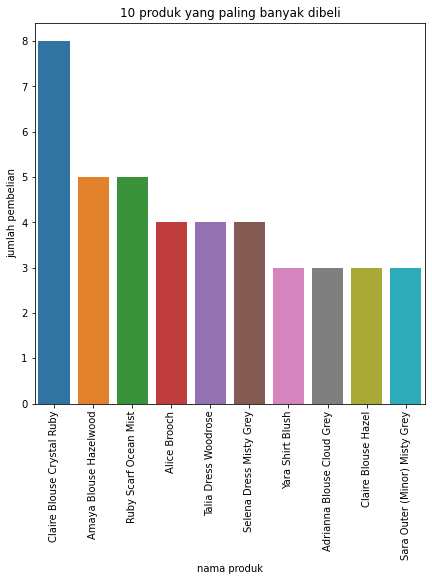

In [128]:
plt.figure(figsize=(7,7))
sns.barplot(x=x, y=y, data=df)
plt.title('10 produk yang paling banyak dibeli')
plt.xticks(np.arange(10), rotation=90)
plt.xlabel('nama produk')
plt.ylabel('jumlah pembelian')
plt.show()

### sebutkan 10 produk dengan total sales tertinggi

C:\Users\fachri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


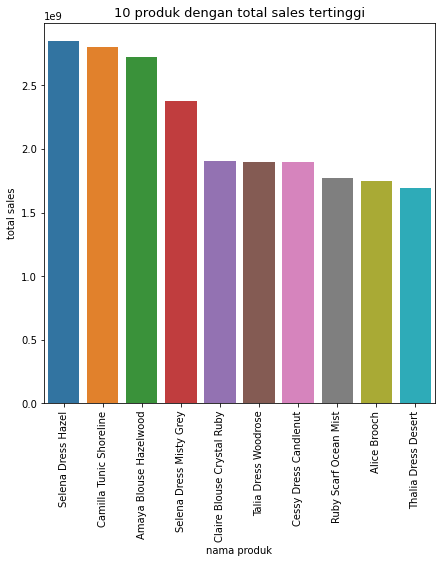

In [130]:
plt.figure(figsize=(7,7))
q = df.groupby('product_title')['total_sales'].sum().sort_values(ascending=False).head(10)
q=pd.DataFrame(q).reset_index()
sns.barplot(q['product_title'], q['total_sales'])
plt.title('10 produk dengan total sales tertinggi', fontsize=13)
plt.xticks(np.arange(10), rotation=90)
plt.xlabel('nama produk')
plt.ylabel('total sales')
plt.show()

### sebutkan 10 shipping city terbanyak

In [131]:
y1=df['shipping_city'].value_counts().head(10).values

In [133]:
x1=df['shipping_city'].value_counts().head(10).index

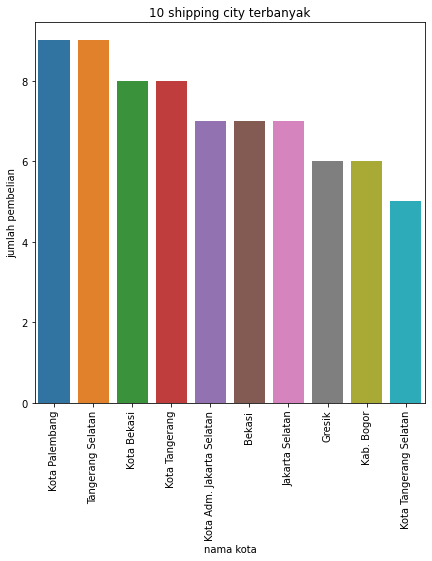

In [134]:
plt.figure(figsize=(7,7))
sns.barplot(x=x1, y=y1, data=df)
plt.title('10 shipping city terbanyak')
plt.xticks(np.arange(10), rotation=90)
plt.xlabel('nama kota')
plt.ylabel('jumlah pembelian')
plt.show()

### sebutkan 10 kota dengan total sales tertinggi

C:\Users\fachri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


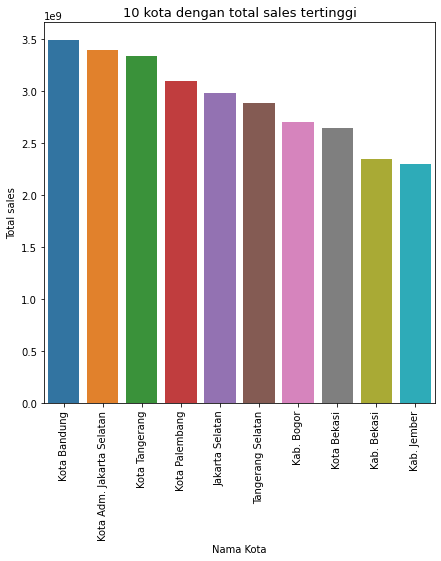

In [137]:
plt.figure(figsize=(7,7))
w = df.groupby('shipping_city')['total_sales'].sum().sort_values(ascending=False).head(10)
w=pd.DataFrame(w).reset_index()
sns.barplot(w['shipping_city'], w['total_sales'])
plt.title('10 kota dengan total sales tertinggi', fontsize=13)
plt.xticks(np.arange(10), rotation=90)
plt.xlabel('Nama Kota')
plt.ylabel('Total sales')
plt.show()

# Analisis

# Berdasarkan Produk
1. claire blouse cristal ruby adalah produk unggulan karena menjadi produk yang paling banyak dibeli dan produk dengan total sales tertinggi ke 5
2. Amaya Blouse hazzlewood adalah produk unggulan karena menjadi produk nomor 2 yang paling banyak dibeli dan produk dengan total sales tertinggi ke 3
3. ruby scarf ocean mist adalah produk unggulan karena menjadi produk nomor 3 yang paling banyak dibeli dan produk dengan total sales tertinggi ke 8
4. Alice brooch adalah produk unggulan karena menjadi produk nomor 4 yang paling banyak dibeli dan produk dengan total sales tertinggi ke 9
5. Thalia dress woodrose adalah produk unggulan karena menjadi produk nomor 4 yang paling banyak dibeli dan produk dengan total sales tertinggi ke 6
6. Selena dress misty grey adalah produk unggulan karena menjadi produk nomor 4 yang paling banyak dibeli dan produk dengan total sales tertinggi ke 4

# Berdasarkan kota
1. Kota Palembang adalah kota dengan shipping city terbanyak dan kota dengan total sales tertinggi ke 4
2. Kota Tangerang Selatan adalah kota dengan shipping city terbanyak dan kota dengan total sales tertinggi ke 4
3. Kota Bekasi adalah kota dengan shipping city terbanyak ke 2 dan kota dengan total sales tertinggi ke 8
4. Kota Tangerang adalah kota dengan shipping city terbanyak ke 2 dan kota dengan total sales tertinggi ke 3

# Rekomendasi

1. Lakukan promosi pada 6 produk unggulan diatas dikarenakan produk tersebut merupakan top 10 produk yang paling banyak dibeli dan top 10 produk yang menghasilkan keuntungan tertinggi. 
2. Lakukan promosi pada 4 kota diatas dikarena kota tersebut adalah kota dengan top 10 shipping city terbanyak dan kota dengan top 10 total sales tertinggi 